# Amplitude and phase errors

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch

The Lax-Wendroff update is

$$f_i^{n+1} = f_i^n - {\alpha\over 2} \left(f_{i+1}^n-f_{i-1}^n\right) + {\alpha^2\over 2}\left(f_{i+1}^n-2f_i^n+f_{i-1}^n\right).$$

In this case, the von Neumann stability analysis gives

$$\xi = 1 - i\alpha \sin k\Delta x - \alpha^2 (1-\cos k\Delta x).$$

Notice that without the $\alpha^2$ term, the update is always unstable, since we would then have $|\xi|^2 = 1 + \alpha^2\sin^2 (k\Delta x)>1$. To investigate what happens when the $\alpha^2$ term is included, let's plot $\xi$ in the complex plane:

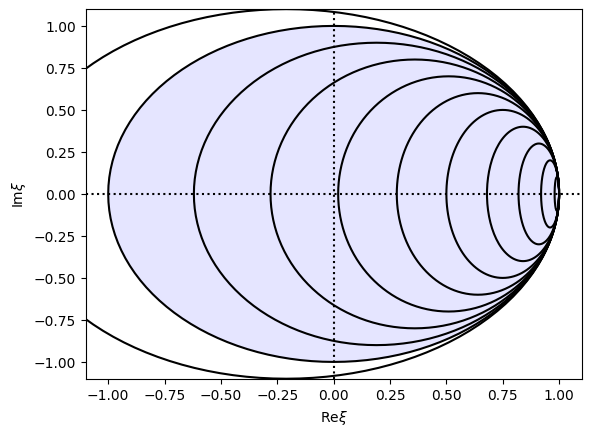

In [43]:
n = 128
x = np.linspace(0,1,n)
dx = x[1]-x[0]
k = np.fft.fftfreq(n) * 2*np.pi/dx
fig, ax = plt.subplots()

plt.plot((-1.1,1.1),(0,0),'k:')
plt.plot((0,0),(-1.1,1.1),'k:')

circle = Circle((0, 0), 1, facecolor='blue',
                edgecolor='none', linewidth=3, alpha=0.1)
ax.add_patch(circle)

for alpha in np.linspace(0.1,1.1,11):
    xi_im = -alpha * np.sin(k*dx)
    xi_re = 1 - alpha**2 * (1-np.cos(k*dx))
    plt.plot(xi_re, xi_im, 'k')

plt.ylim((-1.1,1.1))
plt.xlim((-1.1,1.1))
plt.ylabel(r'$\mathrm{Im} \xi$')
plt.xlabel(r'$\mathrm{Re} \xi$')

plt.show()

The shaded region is the stable region ($|\xi|\leq 1$). The different curves are for different values of $\alpha$. Changing $k$ moves around one of the curves. 

We see that $\alpha=1$ gives $|\xi|=1$ for all $k$ vectors, since then $\xi = \cos k\Delta x - i \sin k\Delta x  = e^{-ik\Delta x}$. This corresponds to a translation of $f(x)$ by an amount $\Delta x$ (you can check that the update reduces to $f_i^{n+1} = f_{i-1}^n$ when $\alpha=1$.

For small $\alpha$, $\xi$ moves closer and closer to the point $(1,0)$. There is both an **amplitude error** (meaning $|\xi|<1$) and a **phase error** ($\mathrm{arg}\,\xi$ depends on $k$).

This explains the much better behavior we saw for pure advection when $\alpha=1$ compared to smaller $\alpha$.